In [88]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('train.csv')

EDA-data exploration-veri keşfi

In [90]:
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S


In [91]:
df.info()
#genel bilgi edinmek için kullanılır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [92]:
df.describe()
#sayısal verilerin istatistiksel bilgilerini verir

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,17.018837
std,133.218871,14.470524
min,8.000000,0.740000
25%,41.000000,7.380000
50%,83.000000,12.860000
75%,250.000000,21.630000
max,402.000000,164.530000


In [93]:
df.nunique()
# benzersiz değerlerin sayısını verir

tarih                  60
ürün                   79
ürün besin değeri      56
ürün kategorisi         6
ürün fiyatı          8554
ürün üretim yeri        2
market                  3
şehir                   8
dtype: int64

In [94]:
df.isnull().sum()
#eksik verileri kontrol eder

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


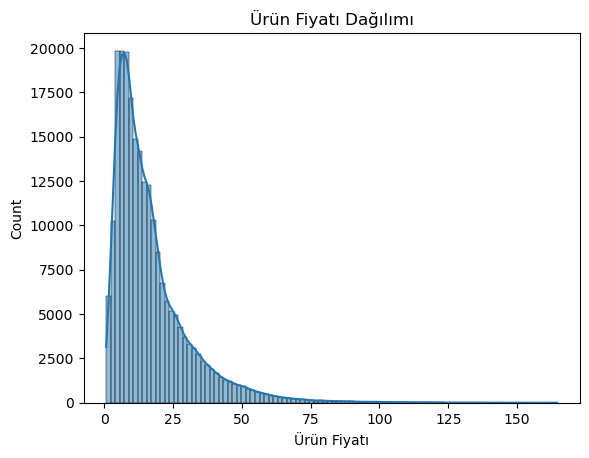

In [95]:
sns.histplot(df['ürün fiyatı'], bins=100, kde=True)
plt.title('Ürün Fiyatı Dağılımı')
plt.xlabel('Ürün Fiyatı')
plt.show()
# Ürün fiyatlarının dağılımını gösterir

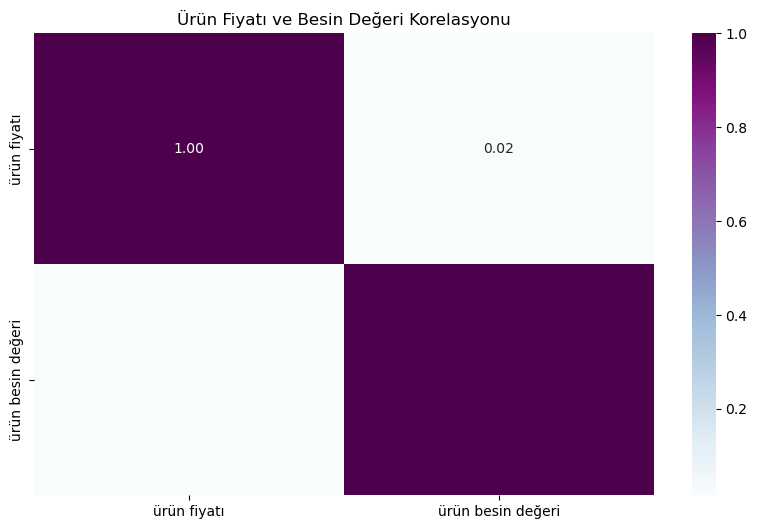

In [96]:
corr=df[["ürün fiyatı","ürün besin değeri"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Ürün Fiyatı ve Besin Değeri Korelasyonu')
plt.show()
# Ürün fiyatı ve besin değeri arasındaki korelasyonu gösterir

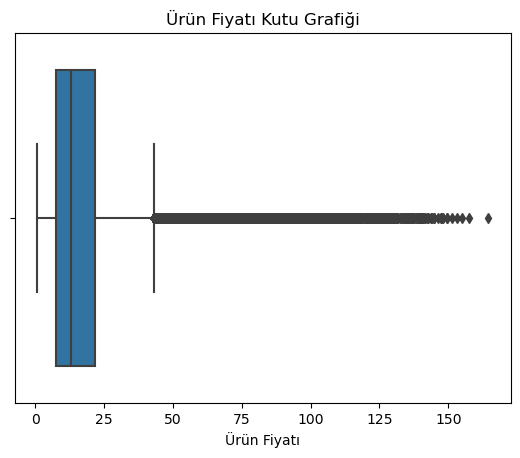

In [97]:
sns.boxplot(x='ürün fiyatı', data=df)
plt.title('Ürün Fiyatı Kutu Grafiği')
plt.xlabel('Ürün Fiyatı')   
plt.show()
# Ürün fiyatlarının kutu grafiğini gösterir

In [98]:
#buradan veri setimizin sağa çarpık olduğunu ve bazı uç değerlerin olduğunu görebiliriz
# uç değerleri temizlemek için IQR yöntemini kullanabiliriz

Data Preprocessing-veri ön işleme

In [99]:
for kategori in df["ürün kategorisi"].unique():
    print(f"{kategori}: {df[df['ürün kategorisi'] == kategori]['ürün fiyatı'].describe()}")
    # her kategori için ürün fiyatlarının istatistiksel bilgilerini yazdırır

et: count    8640.000000
mean       36.961375
std        27.508444
min        10.840000
25%        16.430000
50%        27.910000
75%        45.310000
max       164.530000
Name: ürün fiyatı, dtype: float64
sebze ve bakliyat: count    83520.000000
mean        15.534468
std         11.616547
min          1.960000
25%          7.840000
50%         12.470000
75%         19.530000
max        114.190000
Name: ürün fiyatı, dtype: float64
tahıl ve ürünleri: count    34560.000000
mean         9.976630
std          9.182938
min          0.740000
25%          3.580000
50%          7.080000
75%         13.490000
max         58.360000
Name: ürün fiyatı, dtype: float64
süt ürünleri ve kahvaltılık: count    34560.000000
mean        26.588236
std         16.028897
min          3.960000
25%         15.620000
50%         22.530000
75%         34.460000
max        129.460000
Name: ürün fiyatı, dtype: float64
meyve: count    51840.000000
mean        10.420985
std          5.574803
min          2.910000
25

In [100]:
for kategori in df["ürün kategorisi"].unique():
    alt_df = df[df["ürün kategorisi"] == kategori]

    Q1 = alt_df["ürün fiyatı"].quantile(0.25)
    Q3 = alt_df["ürün fiyatı"].quantile(0.75)

    IQR = Q3 - Q1
    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR

    outliers = alt_df[(alt_df["ürün fiyatı"] < alt_sınır) | (alt_df["ürün fiyatı"] > üst_sınır)]
    print(f"{kategori} kategorisindeki uç değerler:")
    print(outliers[["ürün", "ürün fiyatı"]])
    print(f"{kategori} kategorisinde {outliers.shape[0]} uç değer var.")
    print("-" * 50)
    # her kategori için uç değerleri yazdırır
    # uç değerleri temizlemek için IQR yöntemini kullanır


et kategorisindeki uç değerler:
         ürün  ürün fiyatı
161318  kıyma        90.66
165110  kıyma        91.26
168902  kıyma        92.90
170956  kıyma        91.81
171351  kıyma        90.69
...       ...          ...
227125  kıyma       130.66
227204  kıyma       139.34
227283  kıyma       133.27
227362  kıyma       137.53
227441  kıyma       140.94

[579 rows x 2 columns]
et kategorisinde 579 uç değer var.
--------------------------------------------------
sebze ve bakliyat kategorisindeki uç değerler:
                 ürün  ürün fiyatı
83591   Brüksel laha.        37.50
86751   Brüksel laha.        37.29
87383   Brüksel laha.        38.08
90543   Brüksel laha.        37.75
90701   Brüksel laha.        37.60
...               ...          ...
227453   Fasulye-kuru        39.51
227454   Fasulye-taze        40.25
227457        Ispanak        51.34
227458          Kabak        37.95
227463         Mantar        53.83

[4219 rows x 2 columns]
sebze ve bakliyat kategorisinde 4219 uç de

In [101]:
df["aykiri"] = False  # Yeni sütun: başlangıçta hepsi False

for kategori in df["ürün kategorisi"].unique():
    alt_df = df[df["ürün kategorisi"] == kategori]

    Q1 = alt_df["ürün fiyatı"].quantile(0.25)
    Q3 = alt_df["ürün fiyatı"].quantile(0.75)
    IQR = Q3 - Q1

    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR

    outliers = (df["ürün kategorisi"] == kategori) & (
        (df["ürün fiyatı"] < alt_sınır) | (df["ürün fiyatı"] > üst_sınır)
    )
    df.loc[outliers, "aykiri"] = True

# Uç değerleri temizle
df_temiz = df[df["aykiri"] == False].copy()


In [102]:
df.shape


(227520, 9)

In [103]:
df_temiz.shape

(217652, 9)

Text(0.5, 1.0, 'Ürün Fiyatı Kutu Grafiği (Uç Değerler Temizlendi)')

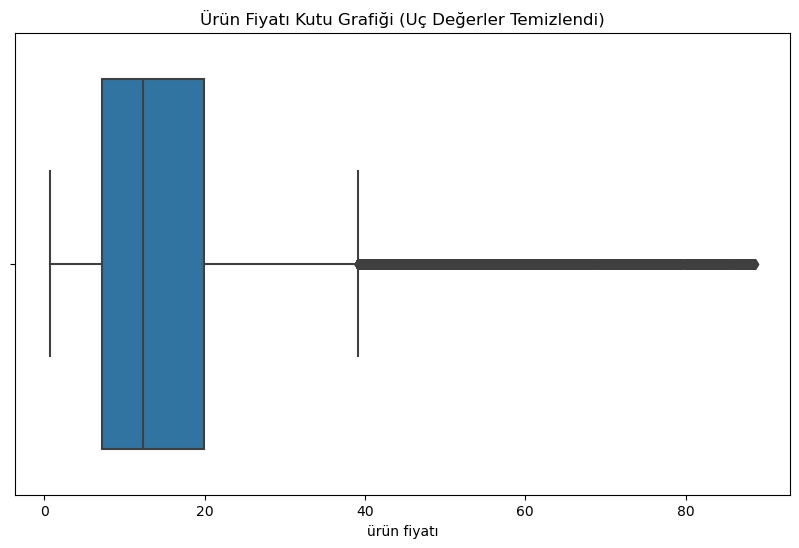

In [104]:
#outlinerları temizledikten sonra boxplotla görebiliriz
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='ürün fiyatı', data=df_temiz)
plt.title('Ürün Fiyatı Kutu Grafiği (Uç Değerler Temizlendi)')


Feature Engineering

In [105]:
#Encoding işlemi
# sayısal veriler için encoding yapmaya gerek yok ama kategorik veriler için label encoding yapabiliriz
#tarih sütununu parçalayabiliriz

from sklearn.preprocessing import LabelEncoder

df_temiz["tarih"] = pd.to_datetime(df_temiz["tarih"])
df_temiz["yıl"] = df_temiz["tarih"].dt.year
df_temiz["ay"] = df_temiz["tarih"].dt.month
df_temiz["gün"] = df_temiz["tarih"].dt.day
df_temiz.drop(columns=["tarih"], inplace=True)

kategorik_sutunlar = ["ürün", "ürün kategorisi", "ürün üretim yeri", "market", "şehir"]
le = LabelEncoder()
for sutun in kategorik_sutunlar:
    df_temiz[sutun] = le.fit_transform(df_temiz[sutun])
# Kategorik verileri sayısal verilere dönüştürür
# Encoding işlemi tamamlandıktan sonra veri setini inceleyebiliriz
df_temiz.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,aykiri,yıl,ay,gün
0,65,120,0,32.70,1,1,6,False,2019,1,1
1,70,103,0,11.04,1,1,6,False,2019,1,1
2,61,160,0,11.20,1,1,6,False,2019,1,1
3,1,354,3,7.04,1,1,6,False,2019,1,1
4,2,72,3,13.28,1,1,6,False,2019,1,1


In [106]:
df_temiz.drop("aykiri", axis=1, inplace=True)
#aykiri sütununu kaldırıyoruz çünkü artık ihtiyacımız yok
df_temiz.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay,gün
0,65,120,0,32.70,1,1,6,2019,1,1
1,70,103,0,11.04,1,1,6,2019,1,1
2,61,160,0,11.20,1,1,6,2019,1,1
3,1,354,3,7.04,1,1,6,2019,1,1
4,2,72,3,13.28,1,1,6,2019,1,1


In [107]:
def besin_kategori(deger):
    if deger < 100:
        return "düşük"
    elif deger < 250:
        return "orta"
    else:
        return "yüksek"

df_temiz["besin_kategorisi"] = df_temiz["ürün besin değeri"].apply(besin_kategori)
# Ürün besin değerine göre kategorileri belirler

le_besin = LabelEncoder()
df_temiz["besin_kategorisi"] = le_besin.fit_transform(df_temiz["besin_kategorisi"])
# Ürün besin kategorilerini sayısal verilere dönüştürür

df_temiz.drop("ürün besin değeri", axis=1, inplace=True)
# Ürün besin değerini kaldırırız çünkü artık ihtiyacımız yok
df_temiz.head()

,ürün,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay,gün,besin_kategorisi
0,65,0,32.70,1,1,6,2019,1,1,1
1,70,0,11.04,1,1,6,2019,1,1,1
2,61,0,11.20,1,1,6,2019,1,1,1
3,1,3,7.04,1,1,6,2019,1,1,2
4,2,3,13.28,1,1,6,2019,1,1,0


In [108]:
test_df = pd.read_csv("testFeatures.csv")  
test_df.head()  # Test veri setini okur ve ilk 5 satırını gösterir


,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2024-01-01,kıyma,120,et,Yurt içi,K,S
1,1,2024-01-01,tavuk,103,et,Yurt içi,K,S
2,2,2024-01-01,hindi,160,et,Yurt içi,K,S
3,3,2024-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,K,S
4,4,2024-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,K,S


In [109]:
test_df["tarih"] = pd.to_datetime(test_df["tarih"])
test_df["yıl"] = test_df["tarih"].dt.year
test_df["ay"] = test_df["tarih"].dt.month
test_df["gün"] = test_df["tarih"].dt.day
test_df.drop(columns=["tarih"], inplace=True)
# Test veri setindeki tarih sütununu parçalar ve gereksiz sütunu kaldırır

from sklearn.preprocessing import LabelEncoder

kategorik_sutunlar = ["ürün", "ürün kategorisi", "ürün üretim yeri", "market", "şehir"]
le = LabelEncoder()
for sutun in kategorik_sutunlar:
    test_df[sutun] = le.fit_transform(test_df[sutun])
# Test veri setindeki kategorik verileri sayısal verilere dönüştürür

In [110]:
test_df.head()  # Test veri setinin ilk 5 satırını gösterir

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,yıl,ay,gün
0,0,65,120,0,1,1,6,2024,1,1
1,1,70,103,0,1,1,6,2024,1,1
2,2,61,160,0,1,1,6,2024,1,1
3,3,1,354,3,1,1,6,2024,1,1
4,4,2,72,3,1,1,6,2024,1,1


In [111]:
    
test_df["besin_kategorisi"] = test_df["ürün besin değeri"].apply(besin_kategori)
# Test veri setindeki ürün besin değerine göre kategorileri belirler

test_df["besin_kategorisi"] = le_besin.transform(test_df["besin_kategorisi"])
# Test veri setindeki ürün besin kategorilerini sayısal verilere dönüştürür

test_df.drop("ürün besin değeri", axis=1, inplace=True)


In [112]:
test_df.head() 

,id,ürün,ürün kategorisi,ürün üretim yeri,market,şehir,yıl,ay,gün,besin_kategorisi
0,0,65,0,1,1,6,2024,1,1,1
1,1,70,0,1,1,6,2024,1,1,1
2,2,61,0,1,1,6,2024,1,1,1
3,3,1,3,1,1,6,2024,1,1,2
4,4,2,3,1,1,6,2024,1,1,0


In [113]:
X = df_temiz.drop("ürün fiyatı", axis=1)
y = df_temiz["ürün fiyatı"]


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Eğitim ve doğrulama veri setlerini ayırır

In [115]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Doğrulama tahminleri
y_pred = model.predict(X_val)

# RMSE (başarı metriği)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Doğrulama RMSE: {rmse:.2f}")


Doğrulama RMSE: 1.10


In [120]:
import numpy as np

idler = test_df["id"].values
test_df=test_df.drop("id", axis=1)

test_predictions = model.predict(test_df)
test_predictions = np.round(test_predictions, 2)

# ID ekleyip kaydet
submission = pd.DataFrame({
    "id": idler,
    "ürün fiyatı": test_predictions
})

submission.to_csv("tahmin_sonuclari.csv", index=False, float_format="%.2f")
print("Tahminler 'tahmin_sonuclari.csv' dosyasına kaydedildi.")


Tahminler 'tahmin_sonuclari.csv' dosyasına kaydedildi.
